# Сращивание

In [9]:
import numpy as np
import matplotlib.pyplot as plt

$$
e y'' + (5x + 5)  y' + 5 y = 0
$$


In [10]:
class NumericalSolver:
    def __init__(self, fa2, fa1, fa0, fx, y0, y1):
        """
        :param fa2: y''
        :param fa1: y'
        :param fa0: y
        :param fx: правая часть
        :param y0: 0
        :param y1: 1
        """
        self.fa2 = fa2
        self.fa1 = fa1
        self.fa0 = fa0
        self.fx = fx
        self.y0 = y0
        self.y1 = y1

    def solve(self, N, epsilon=None, N_epsilon=500000):
        """
        :param N: main
        :param epsilon: окрестность нуля
        :param N_epsilon: [0, epsilon].
        :return: Сетка значений x и численное решение y.
        """
        if epsilon is None:
            x_vals = np.linspace(0, 1, N + 1)
            dx = x_vals[1] - x_vals[0]
            alpha, beta = [0], [0]

            for i in range(1, N + 1):
                x = x_vals[i]
                a2, a1, a0 = self.fa2(x), self.fa1(x), self.fa0(x)

                A = a2 / dx ** 2 + a1 / (2 * dx)
                B = -2 * a2 / dx ** 2 + a0
                C = a2 / dx ** 2 - a1 / (2 * dx)

                alpha_i = -A / (B + C * alpha[i - 1])
                beta_i = (self.fx(x) - C * beta[i - 1]) / (B + C * alpha[i - 1])

                alpha.append(alpha_i)
                beta.append(beta_i)

            y = [0] * (N + 1)
            y[N] = self.y1
            for i in range(N - 1, -1, -1):
                y[i] = alpha[i] * y[i + 1] + beta[i]

            return x_vals, y

        else:
            x_vals_epsilon = np.linspace(0, epsilon, N_epsilon + 1)
            dx_epsilon = x_vals_epsilon[1] - x_vals_epsilon[0]
            x_vals_main = np.linspace(epsilon, 1, N + 1)
            dx_main = x_vals_main[1] - x_vals_main[0]

            alpha_epsilon, beta_epsilon = [0], [0]

            for i in range(1, N_epsilon + 1):
                x = x_vals_epsilon[i]
                a2, a1, a0 = self.fa2(x), self.fa1(x), self.fa0(x)

                A = a2 / dx_epsilon ** 2 + a1 / (2 * dx_epsilon)
                B = -2 * a2 / dx_epsilon ** 2 + a0
                C = a2 / dx_epsilon ** 2 - a1 / (2 * dx_epsilon)

                alpha_i = -A / (B + C * alpha_epsilon[i - 1])
                beta_i = (self.fx(x) - C * beta_epsilon[i - 1]) / (B + C * alpha_epsilon[i - 1])

                alpha_epsilon.append(alpha_i)
                beta_epsilon.append(beta_i)

            alpha_epsilon_last = alpha_epsilon[-1]
            beta_epsilon_last = beta_epsilon[-1]

            alpha_main, beta_main = [alpha_epsilon_last], [beta_epsilon_last]

            for i in range(1, N + 1):
                x = x_vals_main[i]
                a2, a1, a0 = self.fa2(x), self.fa1(x), self.fa0(x)

                A = a2 / dx_main ** 2 + a1 / (2 * dx_main)
                B = -2 * a2 / dx_main ** 2 + a0
                C = a2 / dx_main ** 2 - a1 / (2 * dx_main)

                alpha_i = -A / (B + C * alpha_main[i - 1])
                beta_i = (self.fx(x) - C * beta_main[i - 1]) / (B + C * alpha_main[i - 1])

                alpha_main.append(alpha_i)
                beta_main.append(beta_i)

            y = [0] * (N_epsilon + N + 1)
            y[-1] = self.y1

            for i in range(N - 1, -1, -1):
                y[N_epsilon + i] = alpha_main[i] * y[N_epsilon + i + 1] + beta_main[i]

            for i in range(N_epsilon - 1, -1, -1):
                y[i] = alpha_epsilon[i] * y[i + 1] + beta_epsilon[i]

            x_vals = np.concatenate((x_vals_epsilon, x_vals_main[1:]))
            return x_vals, y

    def plot_solution(self, x_vals, y, title="Численное решение"):
        """
        :param x_vals: x.
        :param y:y(x).
        :param title: name
        """
        plt.plot(x_vals, y, label=title, color="purple")
        plt.xlabel("x")
        plt.ylabel("y(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

In [11]:
fa2 = lambda x: 0.05
fa1 = lambda x: 5 * x + 5
fa0 = lambda x: 5
fx = lambda x: 0

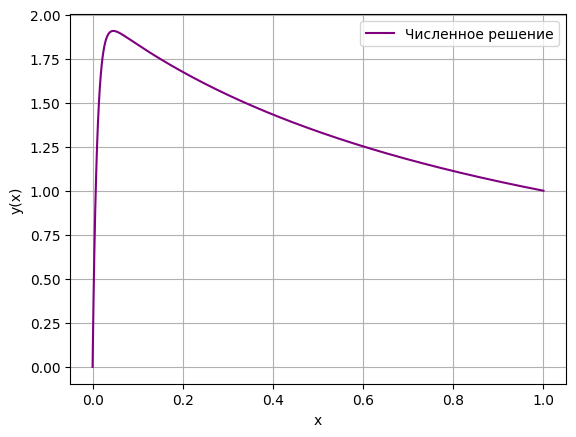

In [12]:
solver = NumericalSolver(fa2, fa1, fa0, fx, y0=0, y1=1)
x_vals, y = solver.solve(N=1000)
solver.plot_solution(x_vals, y)

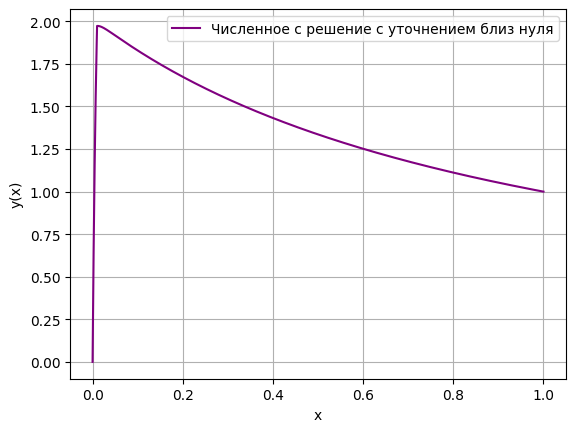

In [13]:
solver = NumericalSolver(fa2, fa1, fa0, fx, y0=0, y1=1)
x_vals, y = solver.solve(N=1000, epsilon=0.01, N_epsilon=10 ** 4)
solver.plot_solution(x_vals, y, 'Численное с решение с уточнением близ нуля')

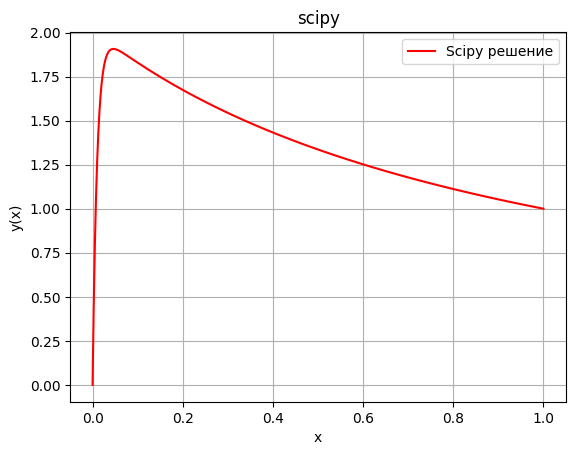

In [14]:
from scipy.integrate import solve_bvp

e = 0.05


def ode_system(x, y):
    y1, y2 = y
    return np.vstack((y2, -(5 * x + 5) * y2 / e - (5 * y1) / e))


def boundary_conditions(ya, yb):
    return np.array([ya[0] - 0, yb[0] - 1])


x_vals = np.linspace(0, 1, 100)
y_guess = np.zeros((2, x_vals.size))  # Начальное приближение 

solution = solve_bvp(ode_system, boundary_conditions, x_vals, y_guess)

plt.plot(solution.x, solution.y[0], label="Scipy решение", color="red")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("scipy")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
e = 0.05
analit_f = lambda x: 10 / (5 * x + 5) + (-2) * np.exp(-5 * x / e)

x_analit = np.linspace(0, 1, 200)
y_analit = [analit_f(x) for x in x_analit]



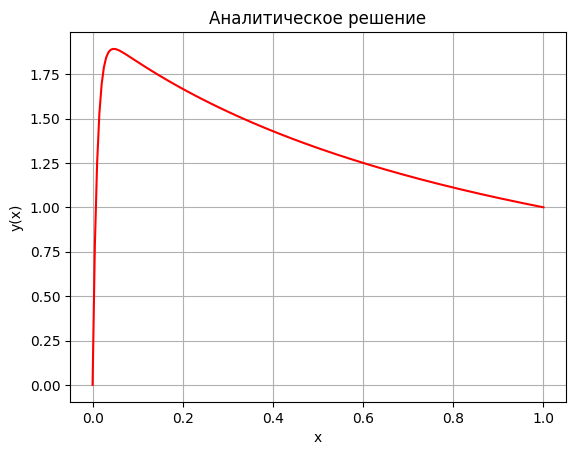

In [16]:
plt.title('Аналитическое решение')
plt.plot(x_analit, y_analit, color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()